<a href="https://colab.research.google.com/github/UmeshShirale09/Bank-Data-Analysis/blob/main/Bank_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Data Analysis**
In this project, the Bank Marketing Dataset was used to build a model that can predict, based on a number of attributes, whether or not a person will make a deposit. The models below are used to build, evaluate, and compare which one is the best:
1. Decision Tree Model
2. Random Forest Model
3. Naive Bayes Model
4. K-Nearest Neighbors Model

In [1]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

# **Loading data**
In this first step we will load our dataset

In [2]:
# Load dataset
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [3]:
df_bank = pd.read_csv('bank-full.csv')
df_bank.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


**Observation**
1. Above data is not in structured format.
  So convert dataset to structured format

In [4]:
# Convert dataset to structured format
df_bank = pd.read_csv('bank-full.csv', delimiter=';')

In [5]:
df_bank.shape

(45211, 17)

**Observation**
1. There are 45211 rows and 17 columns

In [6]:
df_bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**Observation**
1. Dataset is having numerical and categorical data
2. Mixed data (Numerical + Categorical)
3. There are 17 features
4. 'y' is the output

  According to the dataset documentation, we need to remove the 'duration' column because in real-case the duration is only known after the label column is known. This problem can be considered to be 'data leakage' where predictors include data that will not be available at the time you make predictions.

  Link is given here : https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [7]:
# Drop 'duration' column
df_bank = df_bank.drop('duration', axis=1)

# print(df_bank.info())
print('Shape of dataset:', df_bank.shape)
df_bank.head()

Shape of dataset: (45211, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


**Observation**
1. Duration column is drop 
2. Shape of dataset 45211 rows and 16 columns

In [8]:
df_bank.describe()

,age,balance,day,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


# **Histogram Plot**

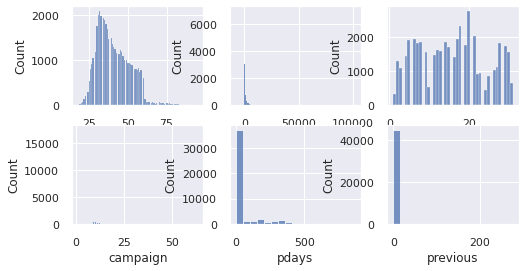

In [74]:
fig, axes = plt.subplots(2, 3) 
sns.histplot(data=df_bank, x='age', ax=axes[0,0]) 
sns.histplot(data=df_bank, x='balance', ax=axes[0,1]) 
sns.histplot(data=df_bank, x='day', ax=axes[0,2]) 
sns.histplot(data=df_bank, x='campaign', ax=axes[1,0]) 
sns.histplot(data=df_bank, x='pdays', ax=axes[1,1]) 
sns.histplot(data=df_bank, x='previous', ax=axes[1,2])

# **Distribution Plot**

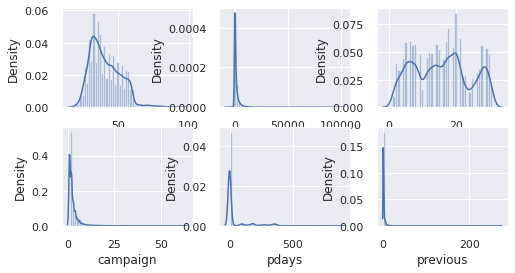

In [76]:
from pylab import *
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
subplot(2,3,1)
sns.distplot(df_bank['age'])
subplot(2,3,2)
sns.distplot(df_bank['balance'])
subplot(2,3,3)
sns.distplot(df_bank['day'])
subplot(2,3,4)
sns.distplot(df_bank['campaign'])
subplot(2,3,5)
sns.distplot(df_bank['pdays'])
subplot(2,3,6)
sns.distplot(df_bank['previous'])


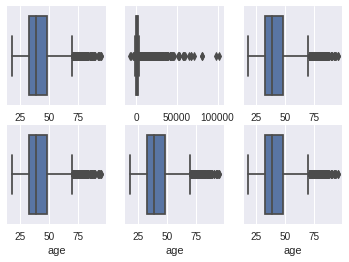

In [24]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 3)

#create boxplot in each subplot
sns.boxplot(data=df_bank, x='age', ax=axes[0,0])
sns.boxplot(data=df_bank, x='balance', ax=axes[0,1])
sns.boxplot(data=df_bank, x='age', ax=axes[0,2])
sns.boxplot(data=df_bank, x='age', ax=axes[1,0])
sns.boxplot(data=df_bank, x='age', ax=axes[1,1])
sns.boxplot(data=df_bank, x='age', ax=axes[1,2])

# **Class Distribution**

no     39922
yes     5289
Name: y, dtype: int64


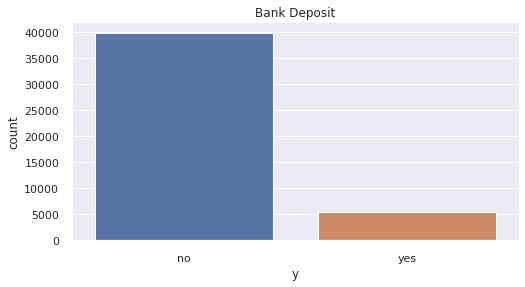

In [77]:
print(df_bank.y.value_counts())
axes1 = sns.countplot(x='y', data=df_bank)
# giving title to the plot
plt.title('Bank Deposit');

**Obeservation**
1. Bank deposit product subscribed by 5289 people out of 45211
2. Bank deposit product not subscribed by 39922 people out of 45211
3. Not subscibed count is greater than the subcription so this dataset is imbalanced data

In [78]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

**Observation**
1. There are 16 features
2. The following features are given in the datset :

   age, job, marital, education, default, balance, housing, loan, contact, day, month, campaign, pdays, previous, poutcome, y
      

In [79]:
df_bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

**Observation**
1. Numerical data : age,  balance, day, campaign, pdays, previous
2. Categorical data : job, marital, education, default, housing, loan, contact, month, poutcome, y

# **Checking Missing Values**

In [80]:
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Observation**
1. There is no missing value in the given dataset

# **Correlation Plot (Heatmap)**

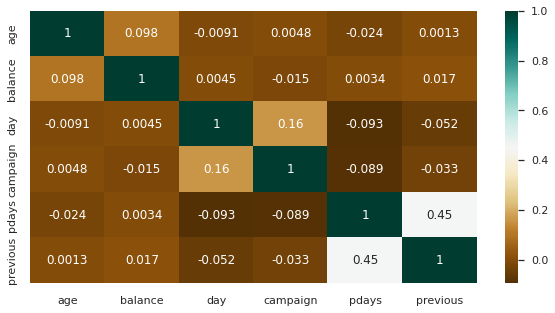

In [81]:
# Plotting a heat map
plt.figure(figsize=(10,5))
c= df_bank.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

In [82]:
# Standardization of dataset

from sklearn.preprocessing import StandardScaler

# copy original dataframe to df_bank_numerical
df_bank_num = df_bank.copy()

scaler = StandardScaler()
num_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
df_bank_num[num_cols] = scaler.fit_transform(df_bank_num[num_cols])
df_bank_num = df_bank_num.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'], axis=1)
df_bank_num.head()


,age,balance,day,campaign,pdays,previous
0,1.606965,0.256419,-1.298476,-0.569351,-0.411453,-0.25194
1,0.288529,-0.437895,-1.298476,-0.569351,-0.411453,-0.25194
2,-0.747384,-0.446762,-1.298476,-0.569351,-0.411453,-0.25194
3,0.571051,0.047205,-1.298476,-0.569351,-0.411453,-0.25194
4,-0.747384,-0.447091,-1.298476,-0.569351,-0.411453,-0.25194


In [83]:
# Encode Categorical Features 

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# copy original dataframe to df_bank_numerical
df_bank_targ = df_bank.copy()

# Drop all features and keep target 'y'
df_bank_targ = df_bank_targ.drop(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome'], axis=1)

# Encode target value yes to 1 and no to 0
df_bank_targ['y'] = df_bank_targ['y'].apply(lambda x: 1 if x == 'yes' else 0)

df_bank_targ.head(15)


,y
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [84]:
# Encode Categorical Features
# OneHot encoder method is used to encode the categorical features

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
catg_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# copy original dataframe to df_bank_numerical
df_bank_catg = df_bank.copy()

df_bank_catg.head()
# Encode categorical Data to Numerical
df_encoded = pd.DataFrame(encoder.fit_transform(df_bank_catg[catg_cols]))
df_encoded.columns = encoder.get_feature_names(catg_cols)

# Replace Categotical Data with Encoded Data
df_bank_catg = df_bank_catg.drop(catg_cols ,axis=1)
df_bank_catg = pd.concat([df_bank_num, df_encoded, df_bank_targ], axis=1)

print('Shape of dataframe:', df_bank_catg.shape)
df_bank_catg.head()


Shape of dataframe: (45211, 51)


,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,1.606965,0.256419,-1.298476,-0.569351,-0.411453,-0.25194,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0.288529,-0.437895,-1.298476,-0.569351,-0.411453,-0.25194,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,-0.747384,-0.446762,-1.298476,-0.569351,-0.411453,-0.25194,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,0.571051,0.047205,-1.298476,-0.569351,-0.411453,-0.25194,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,-0.747384,-0.447091,-1.298476,-0.569351,-0.411453,-0.25194,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


# **Split Dataset for Training and Testing**

Split data into two dataset, training and testing. In this case, split the data into training and testing groups with a ratio of 80:20, respectively This will result in our training data having 36168 rows and 9043 rows for the testing data.

In [85]:
# Select Features
feature = df_bank_catg.drop('y', axis=1)

# Select Target
target = df_bank_catg['y']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (36168, 50)
Shape of testing feature: (9043, 50)
Shape of training label: (36168,)
Shape of training label: (9043,)


# **Modelling**

To evaluate our model we will use the confusion matrix as our base for the evaluation.

There are 6 metrics use to evaluate models:

1. Accuracy: the proportion of true results among the total number of cases examined.
<div align='center'>$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$</div>

  Where: TP = True Positive; FP = False Positive; TN = True Negative; FN = False Negative.
2. Precision: used to calculate how much proportion of all data that was predicted positive **was** actually positive.
<div align='center'>$Precision = \frac{TP}{TP+FP}$</div>
3. Recall: used to calculate how much proportion of actual positives is correctly classified.
<div align='center'>$Recall = \frac{TP}{TP+FN}$</div>
4. F1 score: a number between 0 and 1 and is the harmonic mean of precision and recall.
<div align='center'>$F1 = \frac{2TP}{2TP+FP+FN}$</div>
5. Cohen Kappa Score: Cohen's kappa measures the agreement between two raters who each classify N items into C mutually exclusive categories.
<div align='center'>$\kappa = \frac{p_o-p_e}{1-p_e}$</div>
    where $p_o$ is the empirical probability of agreement on the label assigned to any sample (the observed agreement ratio), and $p_e$ is the expected agreement when both annotators assign labels randomly. $p_e$ is estimated using a per-annotator empirical prior over the class labels.
6. Area Under Curve (AUC): indicates how well the probabilities from the positive classes are separated from the negative classes



In [108]:
# function to evaluate and calculate accuracy, precision, recall, F1-score and kappa score
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    # Visualization of Confusion matrix
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

# **Decision Tree**

A decision tree is a diagram in the shape of a tree that is used to choose a way to proceed. Each branch of the tree indicates a possible decision, occurrence, or response.

In [109]:
# Decision Tree Model

from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

Accuracy: 0.83125069114232
Precision: 0.3045977011494253
Recall: 0.35333333333333333
F1 Score: 0.32716049382716045
Cohens Kappa Score: 0.2312928830679437
Area Under Curve: 0.6236828057883982
Confusion Matrix:
 [[7146  847]
 [ 679  371]]


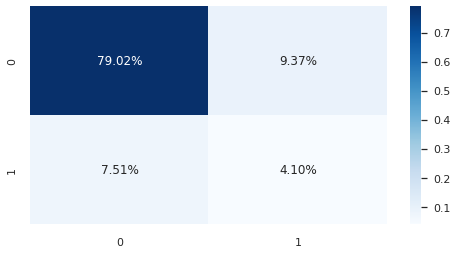

In [110]:
# Evaluate Decision Tree Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

# **Logistic Regression**



In logistic regression, applying linear regression but applying a sigmoid function for the outcome.

<b> Sigmoid  / Logistic Function </B>

$p =1 / 1 + e^{-y}$

<b> Properties of Logistic Regression </b>

* The dependent variable follows a Bernoulli Distribution
* Estimation is maximum likelihood estimation (MLE)


In [120]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)


LogisticRegression()

Accuracy: 0.8928452947030853
Precision: 0.6345514950166113
Recall: 0.1819047619047619
F1 Score: 0.28275351591413767
Cohens Kappa Score: 0.2436191372752664
Area Under Curve: 0.7750854616837353
Confusion Matrix:
 [[7883  110]
 [ 859  191]]


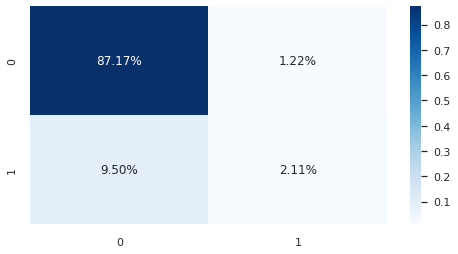

In [121]:
# Evaluate Logistic Regression Model
lr_eval = evaluate_model(logreg, X_test, y_test)

# Print result
print('Accuracy:', lr_eval['acc'])
print('Precision:', lr_eval['prec'])
print('Recall:', lr_eval['rec'])
print('F1 Score:', lr_eval['f1'])
print('Cohens Kappa Score:', lr_eval['kappa'])
print('Area Under Curve:', lr_eval['auc'])
print('Confusion Matrix:\n', lr_eval['cm'])

# **Random Forest**
A technique called random forest, also known as random decision forest, builds several decision trees during training phases. The decision made by the majority of the trees refers to the final decision.

In [95]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Accuracy: 0.8930664602454937
Precision: 0.5954022988505747
Recall: 0.24666666666666667
F1 Score: 0.3488215488215488
Cohens Kappa Score: 0.3012918131367428
Area Under Curve: 0.7833722364211544
Confusion Matrix:
 [[7817  176]
 [ 791  259]]


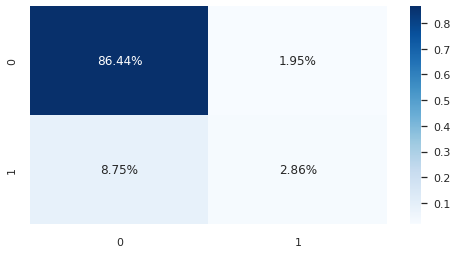

In [96]:
# Evaluate Random Forest Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

# **Naive Bayes**

Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. Below are the Bayes theorem formula:

<div align="center">$P(C | A) = \frac{P(A|C) P(C)}{P(A)}$</div>

In [97]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

Accuracy: 0.8413137233219065
Precision: 0.3555888972243061
Recall: 0.4514285714285714
F1 Score: 0.3978178766261016
Cohens Kappa Score: 0.3079153046567207
Area Under Curve: 0.748110310807671
Confusion Matrix:
 [[7134  859]
 [ 576  474]]


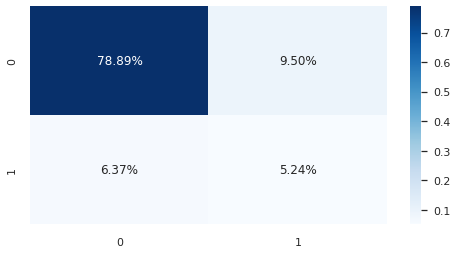

In [98]:
# Evaluate Naive Bayes Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

# **K-Nearest Neighbors**
K-Nearest Neighbors (KNN) classify new data by finding k-number of closest neighbor from the training data and then decide the class based on the majority of it's neighbors. For example in the image below where  k=3  majority of it's neighbor is classified as B, but when  k=7  the majority will changes to A.

In [99]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

Accuracy: 0.8870949906004645
Precision: 0.5333333333333333
Recall: 0.22095238095238096
F1 Score: 0.3124579124579125
Cohens Kappa Score: 0.26227398263972534
Area Under Curve: 0.7023247126950367
Confusion Matrix:
 [[7790  203]
 [ 818  232]]


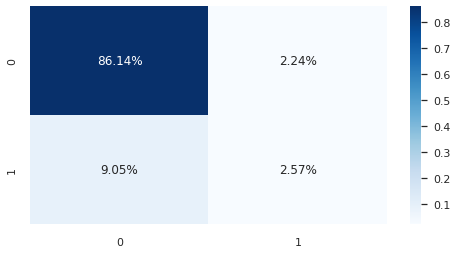

In [100]:
# Evaluate KNN Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

# **Model Comparison**
After building all of our model, we can now compare how well each model perform. To do this we will create two chart, first is a grouped bar chart to display the value of accuracy, precision, recall, f1, and kappa score of our model, and second a line chart to show the AUC of all our models.

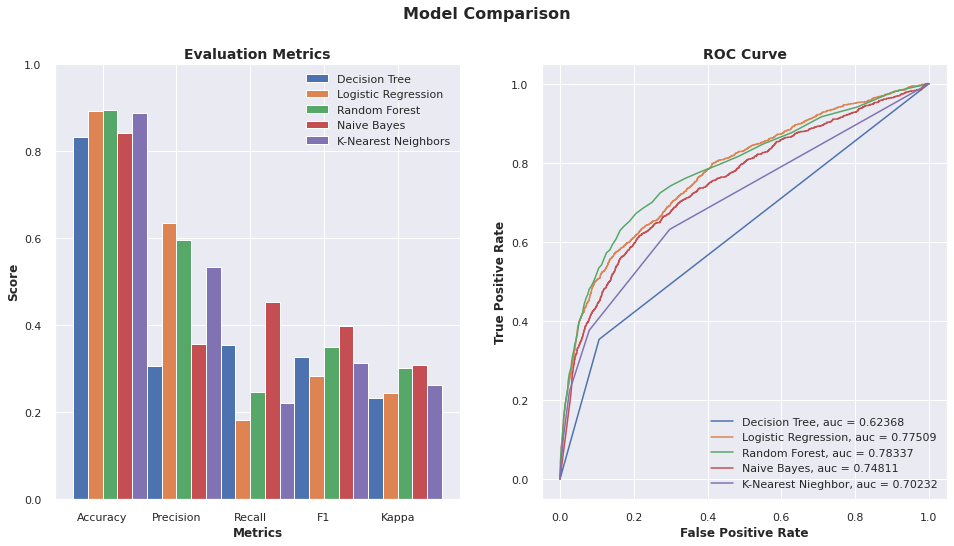

In [136]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(8)
fig.set_figwidth(16)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1'], lr_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r3, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r4, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r5, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(lr_eval['fpr'], lr_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lr_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()